# Binary Classification: Deposit Bank - Marketing

In [18]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
sys.path.append('../main/')

In [3]:
from sklearn.model_selection import train_test_split
from ModelDSBase import ModelDSBaseWrapper

In [20]:
df = pd.read_csv('../../datasets/deposit_ml.csv')

In [22]:
df_r = pd.read_csv('../../datasets/deposit_ml_reduced.csv')

In [23]:
X = df.drop(labels='y', axis=1).values
y = df['y'].values

In [24]:
X_r = df_r.drop(labels='y', axis=1).values
y_r = df_r['y'].values

## SVM Binary Classifier (It takes too much time, although the results are quite good)

In [ ]:
params = SVMBClassificationDSBaseModelParamsToMap()
svmc = ModelDSBaseWrapper('SVM',X,y,[20,25],0.3,SVMBClassificationDSBaseModel,params,splitter=train_test_split)

In [ ]:
svmc.train()

In [ ]:
lcsvmc = svmc.getLearningCurves()

In [ ]:
plt.plot(lcsvmc[0,:],'b',lcsvmc[1,:],'r')

In [ ]:
svmc.getScore()

In [ ]:
svmc.save()

In [ ]:
recoveredSvmc = SVMBClassificationDSBaseModel('SVM1',None,None,None,None,None,None)

In [ ]:
recoveredSvmc.load()

In [ ]:
recoveredSvmc.predict(X[510:515,:])

In [ ]:
y[510:515]

## Random Forest Classificator

In [6]:
from RandomForestClassificationDSBase import RandomForestClassificationDSBaseModel
from RandomForestClassificationDSBase import RandomForestClassificationDSBaseModelParamsToMap

In [43]:
params = RandomForestClassificationDSBaseModelParamsToMap(100,15)
rfc = ModelDSBaseWrapper('RF',X,y,[70,75,80,85,90,95,100],0.3,RandomForestClassificationDSBaseModel,params,splitter=train_test_split)

X size:(45211, 52)
y size:(45211,)
initiating model RF0. RandomForestClassification
initiating model RF1. RandomForestClassification
initiating model RF2. RandomForestClassification
initiating model RF3. RandomForestClassification
initiating model RF4. RandomForestClassification
initiating model RF5. RandomForestClassification
initiating model RF6. RandomForestClassification


In [44]:
rfc.train()

training model RF0. RandomForestClassification
training model RF1. RandomForestClassification
training model RF2. RandomForestClassification
training model RF3. RandomForestClassification
training model RF4. RandomForestClassification
training model RF5. RandomForestClassification
training model RF6. RandomForestClassification


In [45]:
lcrfc = rfc.getLearningCurves()

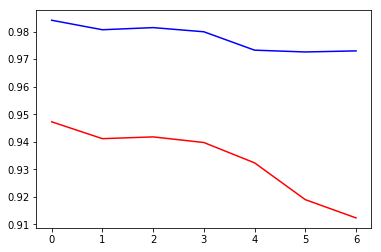

In [55]:
plt.plot(lcrfc[0,:],'b',lcrfc[1,:],'r')

Quite Overfitting!!

In [47]:
rfc.getScore()

0.91234149218519611

In [48]:
rfc.save()

saving model: model_persistance/RandomForestClassification_RF6.sav


In [49]:
recoveredRfc = RandomForestClassificationDSBaseModel('RF6',None,None,None,None,None,None)

initiating empty model RF6. RandomForestClassification


In [50]:
recoveredRfc.load()

loading model: model_persistance/RandomForestClassification_RF6.sav


In [51]:
recoveredRfc.predict(X[510:515,:])

predicting model RF6. RandomForestClassification


array([0, 0, 0, 0, 0])

In [52]:
y[510:515]

array([0, 0, 1, 0, 0])

In [60]:
print(classification_report(rfc.model.y_test,rfc.predict(rfc.model.X_test)))

predicting model RF6. RandomForestClassification
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     11966
          1       0.71      0.44      0.54      1598

avg / total       0.90      0.91      0.90     13564



In [61]:
print(confusion_matrix(rfc.model.y_test,rfc.predict(rfc.model.X_test)))

predicting model RF6. RandomForestClassification
[[11676   290]
 [  899   699]]


## Ada Boosting Classificator

## DNN Classification

# End of Evaluation! 